In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [32]:
df = pd.read_csv('E:\Consumer_Behavior-ShoppingHabits\shopping_behavior_updated.csv')

In [33]:
# Show data
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [34]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [36]:
duplicated_rows = df[df.duplicated(keep=False)]

tính toán và in ra tỷ lệ phần trăm của các giá trị duy nhất trong một cột cụ thể của DataFrame

In [ ]:
def print_dx_perc(data_frame, col):
    if col in data_frame: 
        uni_target = data_frame[col].value_counts() #Tính toán số lượng giá trị duy nhất
        df_len = len(data_frame)# Độ dài của dataframe
        for idx, count in uni_target.iteritems(): # Lặp qua từ
            perc = round((count / df_len) * 100, ndigits=2) # Tính phần trăm
            print(f'{idx} accounts for {perc}% of the {col} column, equal to {count} occurrences on {df_len}') # In ra phần trăm
    else:
        print(f'Column {col} is not in the dataframe') #    Nếu không có cột trong dataframe thì in ra thông báo

In [ ]:
def variable_importance(fit):
    """
    Hàm này tính toán tầm quan trọng của các biến trong mô hình đã huấn luyện.
    Tham số:
    fit: Mô hình đã được huấn luyện từ scikit-learn.
    Trả về:
    Một dictionary chứa:
    - 'importance': Mảng chứa tầm quan trọng của các biến.
    - 'index': Mảng chứa chỉ số của các biến, sắp xếp theo thứ tự giảm dần của tầm quan trọng.
    Ghi chú:
    - Nếu đối tượng 'fit' không phải là một mô hình đã được huấn luyện từ scikit-learn, hàm sẽ in ra thông báo lỗi.
    - Nếu mô hình không có thuộc tính 'feature_importances_', hàm sẽ in ra thông báo lỗi.
    - Nếu mô hình không chứa thuộc tính 'estimators_', hàm sẽ in ra thông báo lỗi.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit))
        if not hasattr(fit, 'feature_importances_'):
            return print("Model does not have feature_importances_ attribute.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances, 'index': indices}

In [ ]:
def print_var_importance(importance, indices, names_index):
    """
    In hàm quan trọng của các biến.

    Hàm này in ra thứ hạng của các biến dựa trên mức độ giảm tạp chất trung bình (Mean Decrease in Impurity).

    Tham số:
    importance (list): Danh sách mức độ quan trọng của các biến.
    indices (list): Danh sách chỉ số của các biến đã được sắp xếp theo mức độ quan trọng.
    names_index (list): Danh sách tên của các biến tương ứng với chỉ số.

    Trả về:
    None
    """
    print("Feature ranking:")
    for f in range(len(indices)):
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1, names_index[indices[f]], importance[indices[f]]))

In [40]:
def variable_importance_plot(importance, indices, names_index):
    importance_desc = [importance[i] for i in indices]
    feature_space = [names_index[i] for i in indices]

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')
    plt.title('Feature Importances for Random Forest Model')
    plt.barh(range(len(importance_desc)), importance_desc, align="center", color='#875FDB')
    plt.yticks(range(len(importance_desc)), feature_space)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()
    plt.show()
    plt.close()

In [ ]:
df = df.drop(columns=['Customer ID']) # Xóa trường 'ID khách hàng'
X = df.drop(columns=['Purchase Amount (USD)'])
y = df['Purchase Amount (USD)']

In [42]:
import pandas as pd
# Lưu DataFrame vào file CSV
df.to_csv('DataForPhanTich.csv', index=False)

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
"""
Lựa chọn các cột có kiểu dữ liệu là object từ DataFrame X và in ra danh sách các cột đó.

Biến:
    X (DataFrame): DataFrame chứa dữ liệu đầu vào.

Biến trả về:
    categorical_cols (Index): Danh sách các cột có kiểu dữ liệu là object.
"""
print("Categorical columns:", categorical_cols)

In [ ]:
for col in categorical_cols:
    """
    Chuyển đổi các cột phân loại thành mã số.

    Tham số:
    categorical_cols (list): Danh sách các tên cột phân loại.
    X (DataFrame): DataFrame chứa dữ liệu cần chuyển đổi.

    Mô tả:
    Vòng lặp này sẽ duyệt qua từng cột trong danh sách `categorical_cols` và chuyển đổi
    các giá trị trong cột đó thành các mã số (số nguyên) tương ứng với từng giá trị phân loại.
    """
    X[col] = X[col].astype('category').cat.codes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
"""
Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra.

Tham số:
X (DataFrame hoặc mảng numpy): Dữ liệu đầu vào.
y (Series hoặc mảng numpy): Nhãn tương ứng với dữ liệu đầu vào.
test_size (float): Tỷ lệ dữ liệu được sử dụng cho tập kiểm tra.
random_state (int): Giá trị ngẫu nhiên để đảm bảo tính tái lập của việc chia dữ liệu.

Trả về:
X_train (DataFrame hoặc mảng numpy): Dữ liệu đầu vào cho tập huấn luyện.
X_test (DataFrame hoặc mảng numpy): Dữ liệu đầu vào cho tập kiểm tra.
y_train (Series hoặc mảng numpy): Nhãn cho tập huấn luyện.
y_test (Series hoặc mảng numpy): Nhãn cho tập kiểm tra.

Ví dụ:
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
>>> print(f"Shape of training data: {X_train.shape}")
"""
print(f"Shape of training data: {X_train.shape}")

Shape of training data: (3120, 16)


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
"""
Huấn luyện mô hình RandomForestRegressor và dự đoán kết quả.

Biến:
    rf_model (RandomForestRegressor): Mô hình rừng ngẫu nhiên với 100 cây và random_state=0.
    X_train (DataFrame hoặc array): Dữ liệu huấn luyện cho các đặc trưng.
    y_train (Series hoặc array): Dữ liệu huấn luyện cho nhãn.
    X_test (DataFrame hoặc array): Dữ liệu kiểm tra cho các đặc trưng.
    y_pred (array): Kết quả dự đoán từ mô hình.

Quy trình:
    1. Khởi tạo mô hình RandomForestRegressor với 100 cây và random_state=0.
    2. Huấn luyện mô hình với dữ liệu huấn luyện X_train và y_train.
    3. Dự đoán kết quả với dữ liệu kiểm tra X_test.
"""
rf_model.fit(X_train, y_train) 
y_pred = rf_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred) 
"""
Tính toán và hiển thị các chỉ số quan trọng của mô hình.

Các biến:
- mae: Giá trị lỗi tuyệt đối trung bình giữa y_test và y_pred.
- feature_importances: Độ quan trọng của các biến trong mô hình rf_model.
- y_test: Dữ liệu thực tế để kiểm tra mô hình.
- y_pred: Dữ liệu dự đoán từ mô hình.
- rf_model: Mô hình rừng ngẫu nhiên đã được huấn luyện.
- X.columns: Tên các cột trong dữ liệu đầu vào X.

Các hàm:
- mean_absolute_error(y_test, y_pred): Tính toán lỗi tuyệt đối trung bình.
- variable_importance(rf_model): Tính toán độ quan trọng của các biến trong mô hình rf_model.
- print_var_importance(importance, index, columns): Hiển thị độ quan trọng của các biến.
"""
feature_importances = variable_importance(rf_model)
print_var_importance(feature_importances['importance'], feature_importances['index'], X.columns)

Feature ranking:
1. The feature 'Age' has a Mean Decrease in Impurity of 0.12338
2. The feature 'Previous Purchases' has a Mean Decrease in Impurity of 0.12185
3. The feature 'Location' has a Mean Decrease in Impurity of 0.11680
4. The feature 'Color' has a Mean Decrease in Impurity of 0.10727
5. The feature 'Review Rating' has a Mean Decrease in Impurity of 0.10639
6. The feature 'Item Purchased' has a Mean Decrease in Impurity of 0.10020
7. The feature 'Frequency of Purchases' has a Mean Decrease in Impurity of 0.06265
8. The feature 'Shipping Type' has a Mean Decrease in Impurity of 0.05573
9. The feature 'Payment Method' has a Mean Decrease in Impurity of 0.05517
10. The feature 'Size' has a Mean Decrease in Impurity of 0.03892
11. The feature 'Season' has a Mean Decrease in Impurity of 0.03569
12. The feature 'Category' has a Mean Decrease in Impurity of 0.03441
13. The feature 'Gender' has a Mean Decrease in Impurity of 0.01419
14. The feature 'Subscription Status' has a Mean Dec

Xếp hạng tính năng:
1. Tính năng 'Tuổi' có Mức giảm tạp chất trung bình là 0,12338
2. Tính năng 'Mua hàng trước đó' có Mức giảm tạp chất trung bình là 0,12185
3. Tính năng 'Vị trí' có Mức giảm tạp chất trung bình là 0,11680
4. Tính năng 'Màu sắc' có Mức giảm tạp chất trung bình là 0,10727
5. Tính năng 'Xếp hạng đánh giá' có Mức giảm tạp chất trung bình là 0,10639
6. Tính năng 'Mặt hàng đã mua' có Mức giảm tạp chất trung bình là 0,10020
7. Tính năng 'Tần suất mua hàng' có Mức giảm tạp chất trung bình là 0,06265
8. Tính năng 'Loại vận chuyển' có Mức giảm tạp chất trung bình là 0,05573
9. Tính năng 'Phương thức thanh toán' có Mức giảm tạp chất trung bình là 0,05517
10. Tính năng 'Kích thước' có Mức giảm tạp chất trung bình là 0,03892
11. Tính năng 'Mùa' có Mức giảm tạp chất trung bình là 0,03569
12. Tính năng 'Thể loại' có Mức giảm tạp chất trung bình là 0,03441
13. Tính năng 'Giới tính' có Mức giảm tạp chất trung bình là 0,01419
14. Tính năng 'Trạng thái đăng ký' có Mức giảm tạp chất trung bình là 0,01164
15. Tính năng 'Mã khuyến mại đã sử dụng' có Mức giảm tạp chất trung bình là 0,00794
16. Tính năng 'Giảm giá đã áp dụng' có Mức giảm tạp chất trung bình là 0,00777

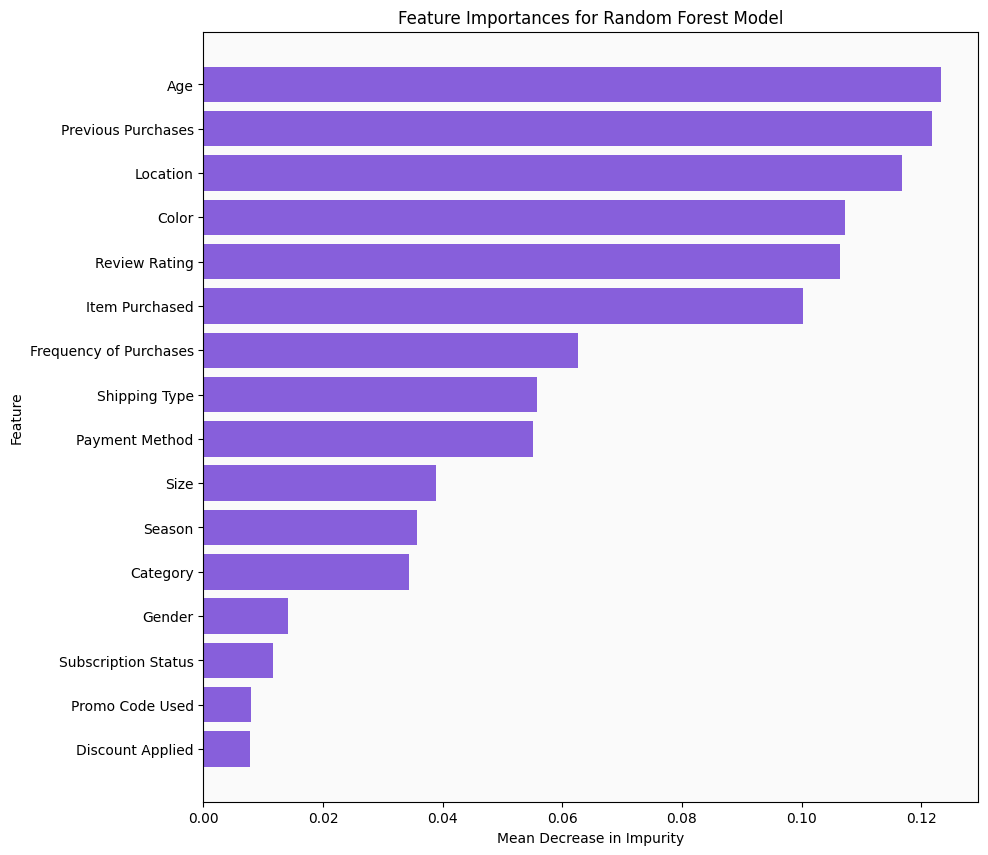

In [ ]:
variable_importance_plot(feature_importances['importance'], feature_importances['index'], X.columns)
"""
Hàm vẽ biểu đồ tầm quan trọng của các biến.

Tham số:
- feature_importances['importance']: Danh sách tầm quan trọng của các biến.
- feature_importances['index']: Danh sách chỉ số của các biến.
- X.columns: Danh sách tên các cột trong tập dữ liệu X.

Trả về:
- Biểu đồ tầm quan trọng của các biến.
"""

In [ ]:
mae = mean_absolute_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

# Hiển thị hiệu suất của mô hình RandomForestRegressor
print("RandomForestRegressor Performance:")
print(f"MAE: {mae}") # Sai số tuyệt đối trung bình
print(f"R²: {r2}") # Hệ số xác định

RandomForestRegressor Performance:
MAE: 20.600141025641026
R²: -0.04735833761018071


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Các thông số tìm kiếm tốt nhất
best_params = grid_search.best_params_
print("Best Parameters from GridSearchCV:")
print(best_params)

# Thêm mô hình với các tham số di chuyển
best_rf_model = grid_search.best_estimator_
y_pred_optimized = best_rf_model.predict(X_test)

Best Parameters from GridSearchCV:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# Tính toán các chỉ số hiệu suất của mô hình tối ưu hóa
mae_optimized = mean_absolute_error(y_test, y_pred_optimized) # Sai số tuyệt đối trung bình
r2_optimized = r2_score(y_test, y_pred_optimized) # Hệ số xác định

# Hiển thị hiệu suất của mô hình tối ưu hóa
print("Optimized Model Performance:")
print(f"MAE: {mae_optimized}") # Sai số tuyệt đối trung bình
print(f"R²: {r2_optimized}") # Hệ số xác định

Optimized Model Performance:
MAE: 20.35705960883378
R²: -0.021069062241058978


In [ ]:
# Dự đoán giá trị 'Purchase Amount (USD)' cho toàn bộ dữ liệu
df['Predicted'] = rf_model.predict(X)

# Định giá mô hình được tối ưu hóa
mae_Pred_X = mean_absolute_error(df['Purchase Amount (USD)'], df['Predicted']) # Tính sai số tuyệt đối trung bình
r2_Pred_X = r2_score(df['Purchase Amount (USD)'], df['Predicted']) # Tính hệ số xác định

# Hiển thị hiệu suất của mô hình
print("Predizione Totale Performance:")
print(f"MAE: {mae_Pred_X}") # Sai số tuyệt đối trung bình
print(f"R²: {r2_Pred_X}") # Hệ số xác định

Predizione Totale Performance:
MAE: 10.320364102564103
R²: 0.6794457839166029


In [ ]:
grouped_df = df.groupby(['Gender', 'Location']).agg({'Purchase Amount (USD)': 'mean', 'Predicted': 'mean'}).reset_index()

grouped_df['Predicted'] = grouped_df['Predicted'].round(3)


grouped_df = grouped_df.sort_values(by='Location')



def plot_combined(data, title, y_min, y_max):
    """
    Vẽ biểu đồ kết hợp giữa biểu đồ cột và biểu đồ đường.
    Hàm này tạo ra một biểu đồ kết hợp giữa biểu đồ cột (bar plot) và biểu đồ đường (line plot)
    để so sánh giá trị thực tế và giá trị dự đoán của số tiền mua hàng theo từng địa điểm.
    Tham số:
    data (DataFrame): Dữ liệu chứa các cột 'Location', 'Purchase Amount (USD)', và 'Predicted'.
    title (str): Tiêu đề của biểu đồ.
    y_min (float): Giá trị tối thiểu của trục y.
    y_max (float): Giá trị tối đa của trục y.
    Trả về:
    None: Hàm này không trả về giá trị nào, chỉ hiển thị biểu đồ.
    """
    fig, ax1 = plt.subplots(figsize=(12, 8))

    sns.barplot(data=data, x='Location', y='Purchase Amount (USD)', color='green', ax=ax1)
    ax1.set_ylabel('Actual Purchase Amount (USD)')
    ax1.set_xlabel('Location')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.set_ylim(y_min, y_max)

    ax2 = ax1.twinx()
    sns.lineplot(data=data, x='Location', y='Predicted', color='red', marker='o', ax=ax2)
    ax2.set_ylabel('Predicted Purchase Amount (USD)')
    ax2.set_ylim(y_min, y_max)

    plt.title(title)
    fig.tight_layout()
    plt.show()

Table of Predicted Values for Males by Location:


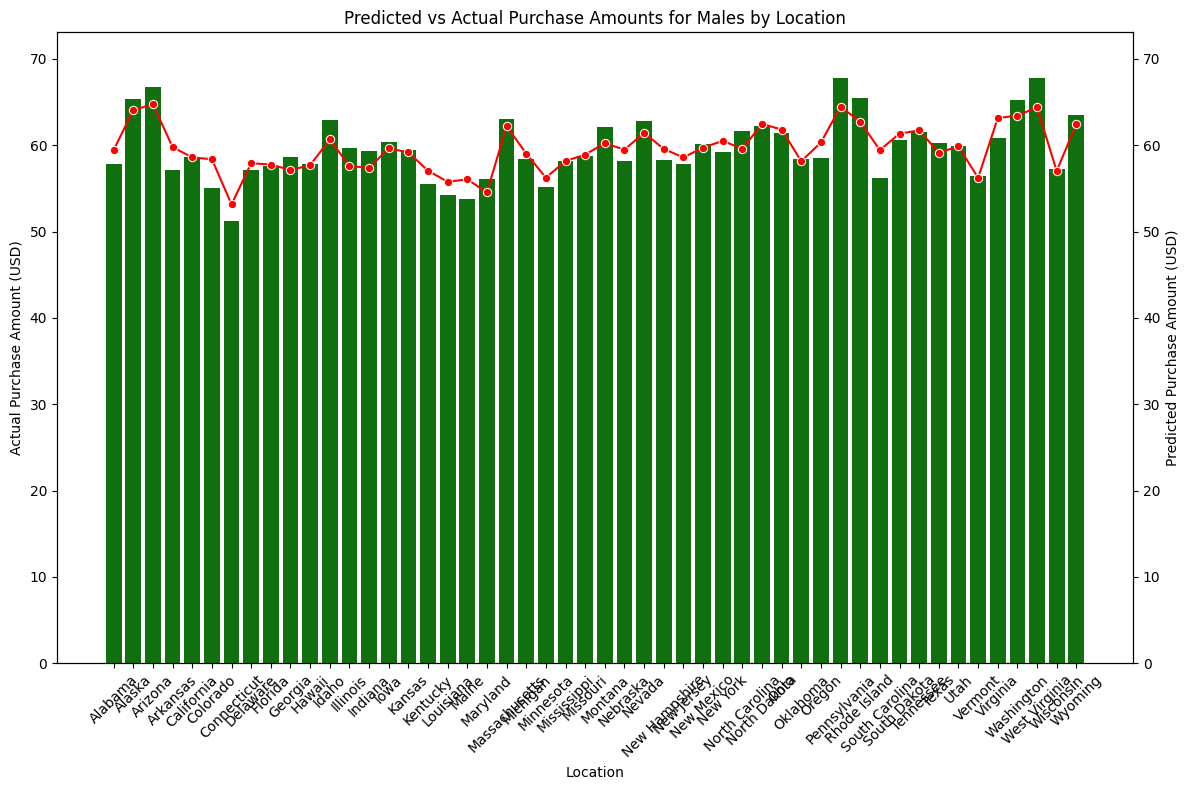

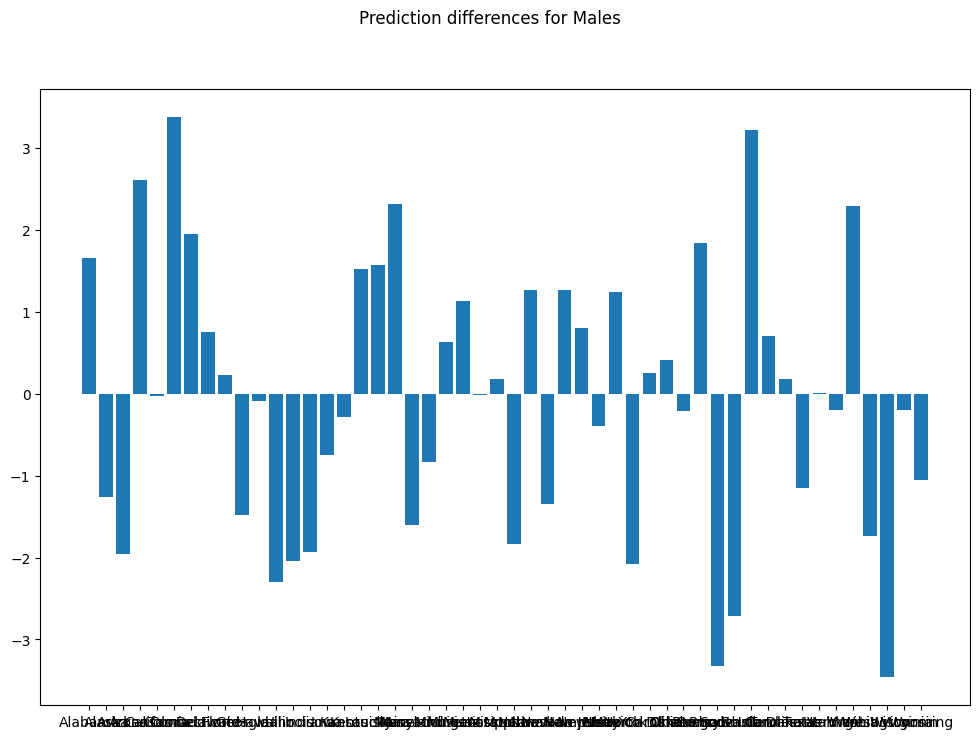

Series([], dtype: float64)


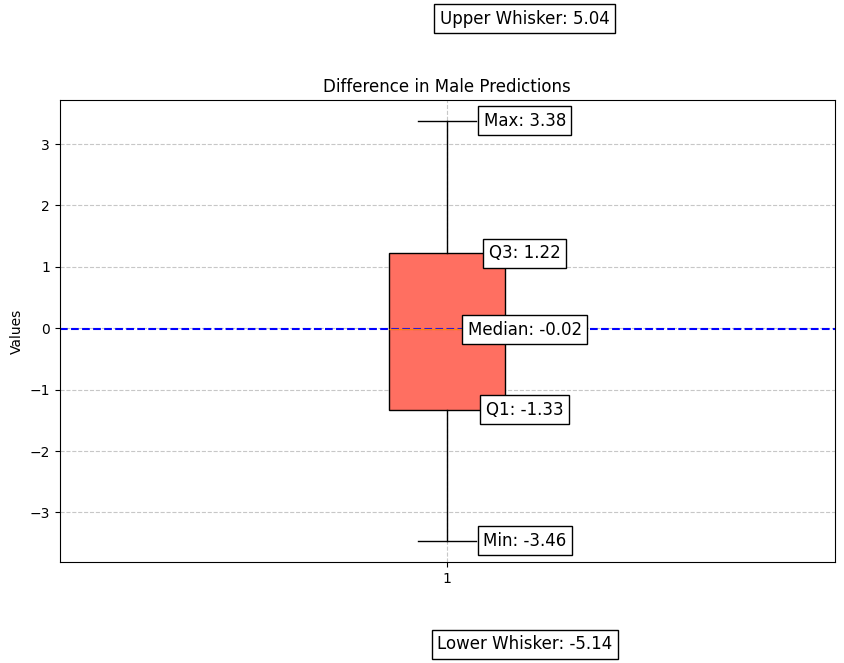

Table of Predicted Values for Females by Location:


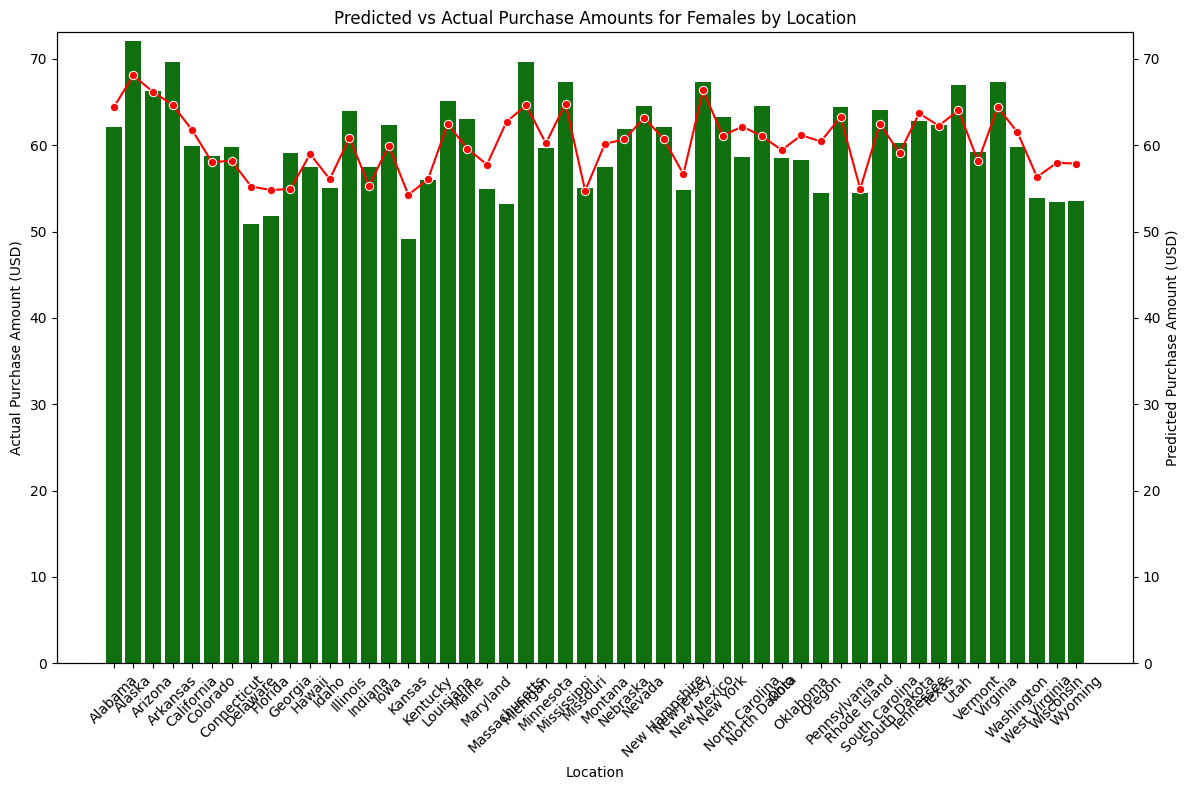

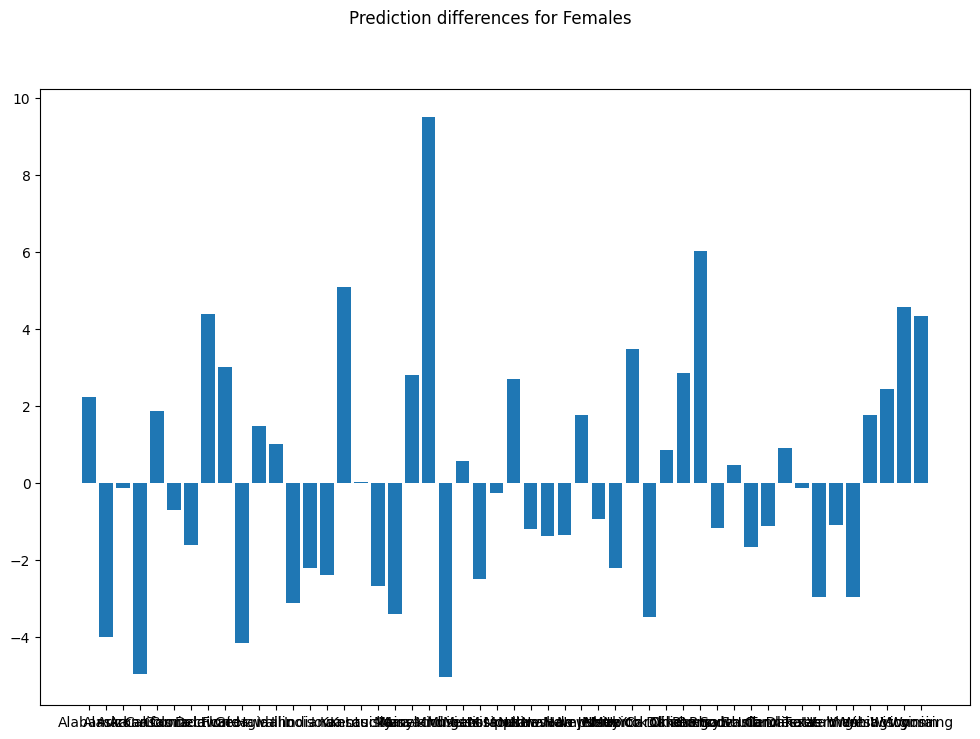

20    9.491
dtype: float64


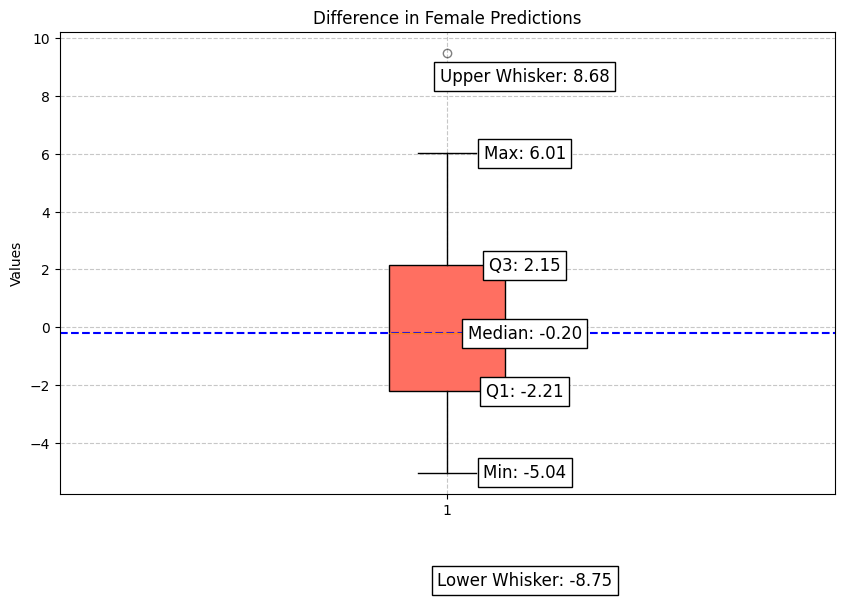

In [ ]:
for gender in ['Male', 'Female']:
        print(f"Table of Predicted Values for {gender}s by Location:")
        grouped_df_gender = grouped_df[grouped_df['Gender'] == gender]
        
        # Vẽ biểu đồ kết hợp giữa giá trị thực tế và giá trị dự đoán
        plot_combined(grouped_df_gender, f'Predicted vs Actual Purchase Amounts for {gender}s by Location', 0, grouped_df['Purchase Amount (USD)'].max() + 1)

        # Tính toán sự khác biệt của xu hướng hiện tại
        dif_pred = grouped_df_gender['Predicted'] - grouped_df_gender['Purchase Amount (USD)']

        # Vẽ biểu đồ cột cho sự khác biệt dự đoán
        plt.figure(figsize=(12, 8))
        plt.bar(grouped_df_gender['Location'], dif_pred)
        plt.suptitle(f'Prediction differences for {gender}s')
        plt.show()

        # Vẽ biểu đồ hộp (Box plot)
        try:
                median = np.median(dif_pred)
                q1 = np.percentile(dif_pred, 25)
                q3 = np.percentile(dif_pred, 75)
                iqr = q3 - q1
                lower_whisker = q1 - 1.5 * iqr
                upper_whisker = q3 + 1.5 * iqr

                non_outlier_mask = (dif_pred >= lower_whisker) & (dif_pred <= upper_whisker)
                non_outliers = dif_pred[non_outlier_mask]
                min_val = np.min(non_outliers)
                max_val = np.max(non_outliers)
                outliers = dif_pred[~non_outlier_mask]
                print(outliers)
                
                fig, ax = plt.subplots(figsize=(10, 6))
                box = ax.boxplot(dif_pred, patch_artist=True, showfliers=True)
                colors = ['#FF6F61']
                for patch, color in zip(box['boxes'], colors):
                        patch.set_facecolor(color)
                for flier in box['fliers']:
                        flier.set(marker='o', color='red', alpha=0.5) #outliers

                # Thêm chú thích cho các giá trị thống kê
                ax.text(1.1, median, f'Median: {median:.2f}', horizontalalignment='center', verticalalignment='center',
                                fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
                ax.text(1.1, q1, f'Q1: {q1:.2f}', horizontalalignment='center', verticalalignment='center',
                                fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
                ax.text(1.1, q3, f'Q3: {q3:.2f}', horizontalalignment='center', verticalalignment='center',
                                fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
                ax.text(1.1, lower_whisker, f'Lower Whisker: {lower_whisker:.2f}', horizontalalignment='center',
                                verticalalignment='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
                ax.text(1.1, upper_whisker, f'Upper Whisker: {upper_whisker:.2f}', horizontalalignment='center',
                                verticalalignment='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
                ax.text(1.1, min_val, f'Min: {min_val:.2f}', horizontalalignment='center', verticalalignment='center',
                                fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
                ax.text(1.1, max_val, f'Max: {max_val:.2f}', horizontalalignment='center', verticalalignment='center',
                                fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

                ax.axhline(y=median, color='blue', linestyle='--', linewidth=1.5)
                ax.set_ylabel('Values')
                ax.set_title(f'Difference in {gender} Predictions')
                ax.grid(True, linestyle='--', alpha=0.7)

                plt.show()
        except Exception as e:
                print(f"Đã xảy ra lỗi: {e}")

HỒI QUY TUYẾN TÍNH

Phân chia dữ liệu theo giới tính

In [55]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

In [56]:
# Lưu DataFrame vào file CSV
df_male.to_csv('df_male.csv', index=False)
df_female.to_csv('df_female.csv', index=False)

In [ ]:
def regression_plot(df, title):
    np.random.seed(0)
    # Chia dữ liệu thành đầu vào (X) và đầu ra (y)
    X = df.drop(columns=['Purchase Amount (USD)', 'Gender'])
    y = df['Purchase Amount (USD)']
    
    # Mã hóa các cột phân loại
    categorical_cols = X.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        X[col] = X[col].astype('category').cat.codes
    
    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Xây dựng và huấn luyện mô hình hồi quy tuyến tính
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Vẽ biểu đồ phân tán (Scatter Plot)
    plt.scatter(y_test, y_pred, color="black")
    
    # Vẽ đường y=x để so sánh
    max_val = max(max(y_test), max(y_pred))
    min_val = min(min(y_test), min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")
    
    # Thêm nhãn và tiêu đề
    plt.xlabel('Số Tiền Mua Thực Tế (USD)')
    plt.ylabel('Số Tiền Mua Dự Kiến (USD)')
    plt.title(title)
    plt.show()

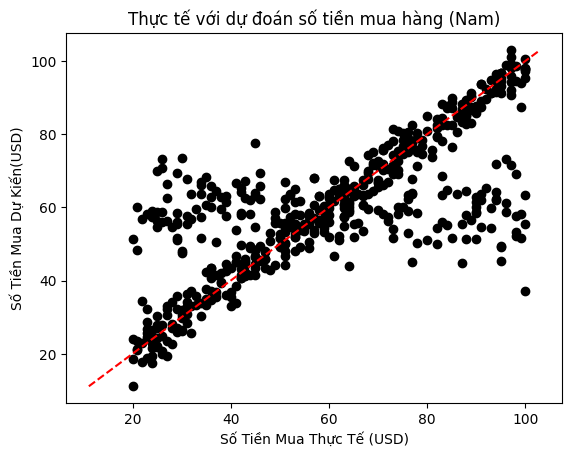

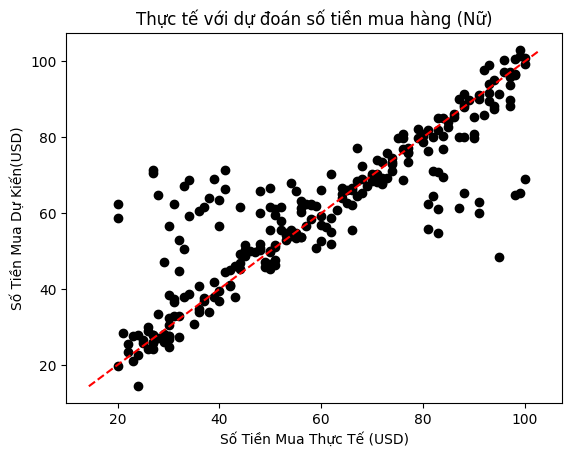

In [58]:
regression_plot(df_male, 'Thực tế với dự đoán số tiền mua hàng (Nam)')
regression_plot(df_female, 'Thực tế với dự đoán số tiền mua hàng (Nữ)')